# **Exploración**


<p align="justify">Se descarga la Base de Datos "Estimation of obesity levels based on eating habits and physical condition Data Set" del repositorio en línea "UCI Machine Learning Repository". El conjunto de datos cuenta con 17 variables y 2111 observaciones con información de 3 países del continente americano con información relativa a la condición física y los hábitos alimenticios de 2111 individuos. El objetivo es identificar cuáles son los hábitos y condiciones que conllevan a un individuo a presentar niveles de obesidad.</p> 

Las variables a evaluar son:

1. Género
2. Edad
3. Altura
4. Peso
5. Historial familiar con sobrepeso
6. FAVC: ¿Consume alimentos ricos en calorías con frecuencia?
7. FCVC: ¿Suele consumir verduras en las comidas?
8. NCP: ¿Cuántas comidas principales realiza al día?
9. CAEC: Consume algún alimento entre comidas?
10. Es fumador
11. CH2O: ¿Cuánta agua bebe diariamente?
12. SCC: ¿Controla las calorías que consume diariamente?
13. FAF: ¿Con qué frecuencia realiza actividad física?
14. TUE: ¿Cuánto tiempo utiliza dispositivos tecnológicos como celular, videojuegos, televisión, computadora y otros?
15. CALC: ¿Con qué frecuencia bebe alcohol?
16. MTRANS: ¿Qué transporte utiliza habitualmente?
17. NObeyesdad: Nivel de obesidad

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('../Datos/Base.csv')


In [11]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [38]:
X = dataset.drop(columns=['NObeyesdad'])
y = dataset['NObeyesdad']

In [39]:
print(X.shape)

(2111, 16)


In [40]:
print(y.shape)

(2111,)


In [19]:
dataset.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [20]:
dataset.describe(include='number')

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
dataset.info

<bound method DataFrame.info of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FA

In [22]:
dataset.iloc[0:10]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [41]:
print(X.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  


In [42]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [43]:
print(X.nunique())

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
dtype: int64


In [44]:
# Analisis de las variables numericas. 
print(X.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [45]:
X.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,1068,1726,1866,1765,2067,2015,1401,1580


In [46]:
y.describe(include='object')

count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object

In [47]:
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 2111 entries, 0 to 2110
Series name: NObeyesdad
Non-Null Count  Dtype 
--------------  ----- 
2111 non-null   object
dtypes: object(1)
memory usage: 16.6+ KB
None


In [48]:
print(y.nunique())

7


In [49]:
print(y.describe())

count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object


## Análisis descriptivo de variables

Se realiza un estudio descriptivo de las variables del conjunto de datos.
Variable objetivo / target: NObeyesdad: Nivel de obesidad.

Se evalúa la variable Género: Variable de carácter categórica y binaria. No cuenta con registros faltantes.

count     2111
unique       2
top       Male
freq      1068
Name: Gender, dtype: object


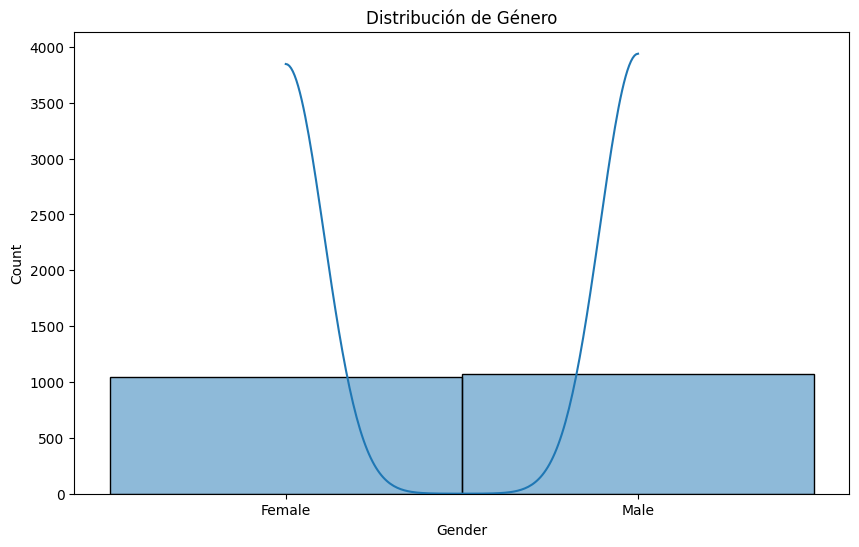

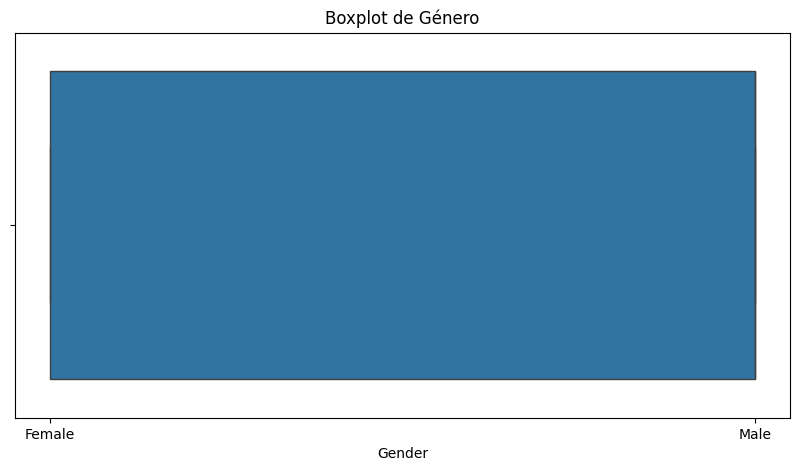

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descripción de la variable 'Género'
print(dataset['Gender'].describe())

# Histograma de la variable 'Género'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Gender'], kde=True)
plt.title('Distribución de Género')
plt.show()

# Boxplot de la variable 'Género'
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['Gender'])
plt.title('Boxplot de Género')
plt.show()

Se evalua la variable edad: Variable numérica continua. El conjunto de datos cuenta con registros de individuos desde 14 años hasta 61 años con una media de 24.3 años. No cuenta con registros faltantes.

<Axes: xlabel='Age', ylabel='Weight'>

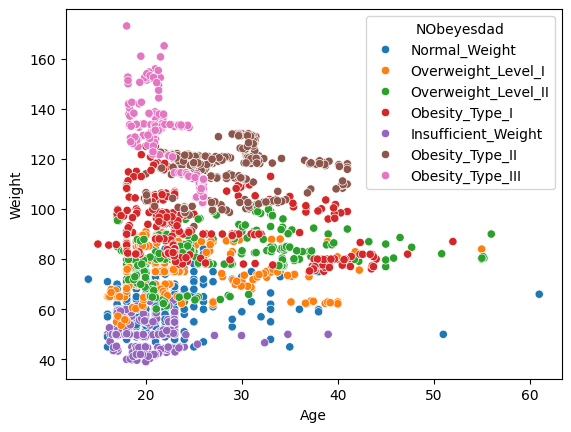

In [52]:
import seaborn as sns
sns.scatterplot(dataset,x='Age',y='Weight',hue='NObeyesdad')

De la gráfica se deduce que la obesidad se concentra en los primeros años. La poblacion se encuentra concentrada entre los 20 y 30 años.

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64


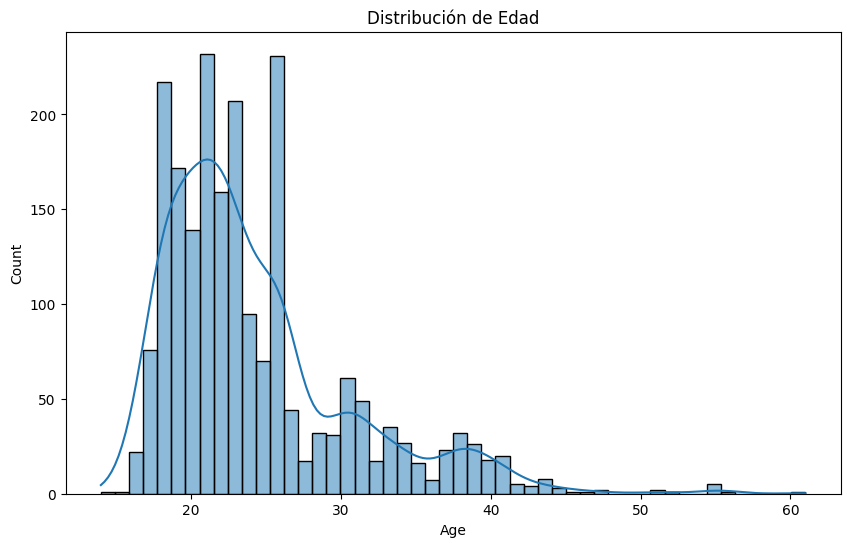

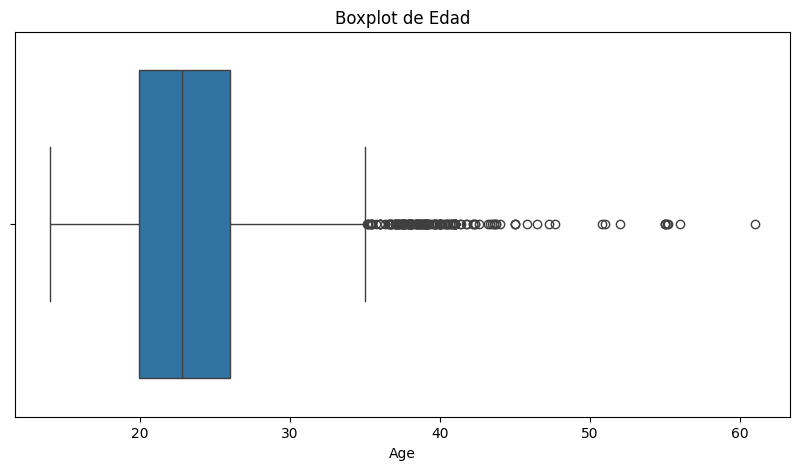

In [30]:
# Descripción de la variable 'Edad'
print(dataset['Age'].describe())

# Histograma de la variable 'Edad'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], kde=True)
plt.title('Distribución de Edad')
plt.show()

# Boxplot de la variable 'Edad'
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['Age'])
plt.title('Boxplot de Edad')
plt.show()

Se evalua la variable altura: Variable numérica continua. El conjunto de datos cuenta con registros de individuos desde 1.45 metros a 1.98 metros con una media de 1.70 metros. No cuenta con registros faltantes.

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64


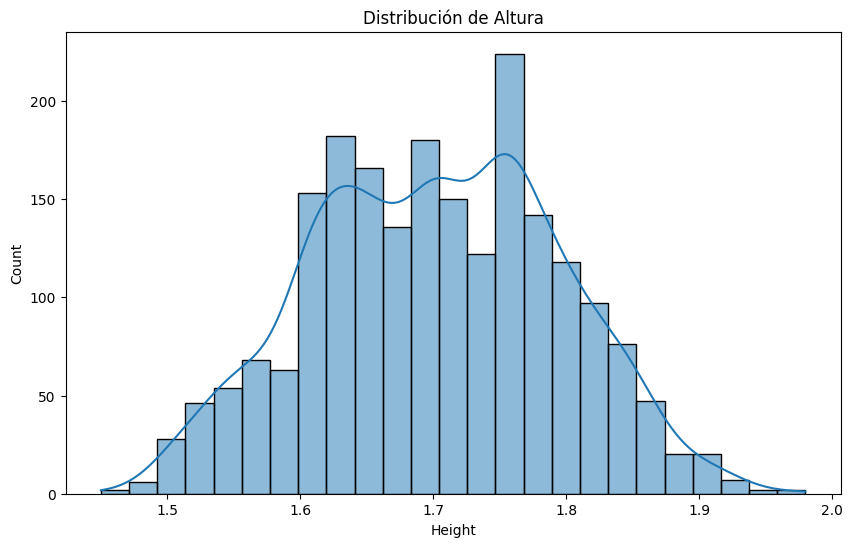

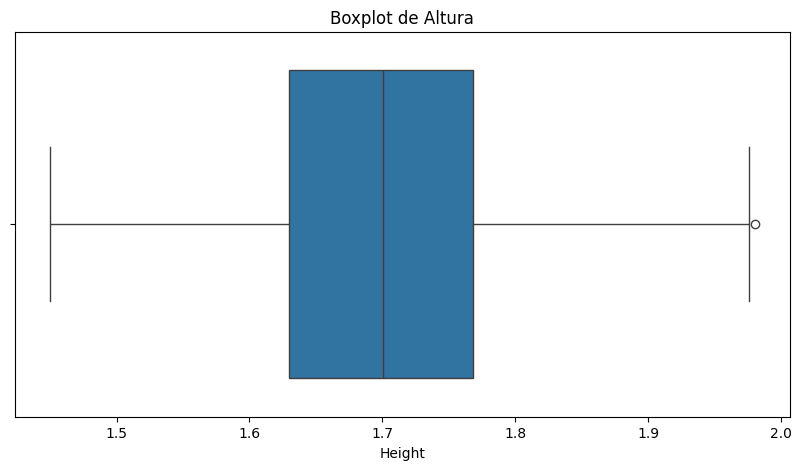

In [31]:
# Descripción de la variable 'Altura'
print(dataset['Height'].describe())

# Histograma de la variable 'Altura'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Height'], kde=True)
plt.title('Distribución de Altura')
plt.show()

# Boxplot de la variable 'Altura'
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['Height'])
plt.title('Boxplot de Altura')
plt.show()

Se evalua la variable peso: Variable numérica continua. El conjunto de datos cuenta con registros de individuos desde 39 kilogramos hasta 173 kilos con una media de 83.6 kilos. No cuenta con registros faltantes.

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64


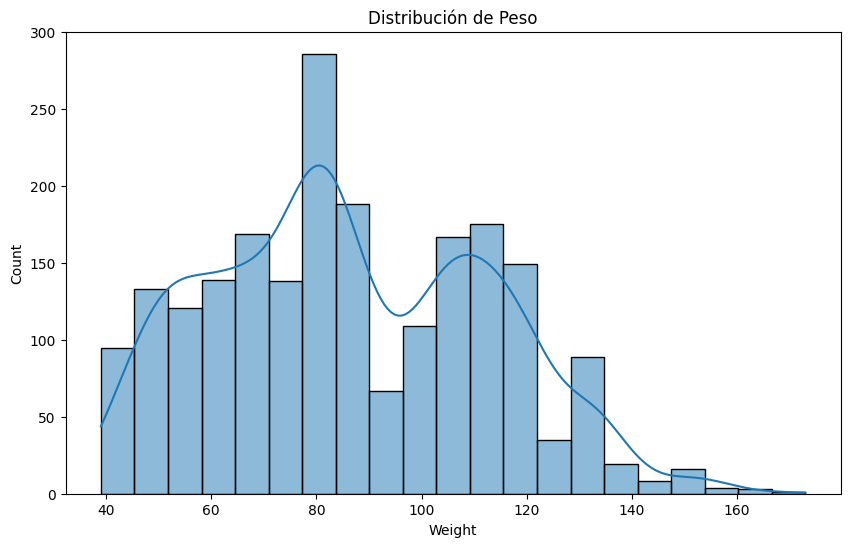

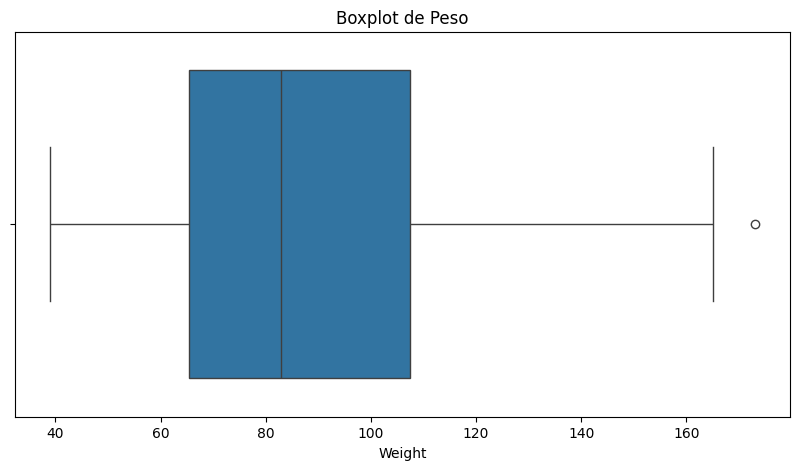

In [32]:
# Descripción de la variable 'Peso'
print(dataset['Weight'].describe())

# Histograma de la variable 'Peso'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Weight'], kde=True)
plt.title('Distribución de Peso')
plt.show()

# Boxplot de la variable 'Peso'
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['Weight'])
plt.title('Boxplot de Peso')
plt.show()

Se visualiza que las mujeres tienden a presentar mayores niveles de obesidad que los hombres

<Axes: xlabel='Gender', ylabel='Weight'>

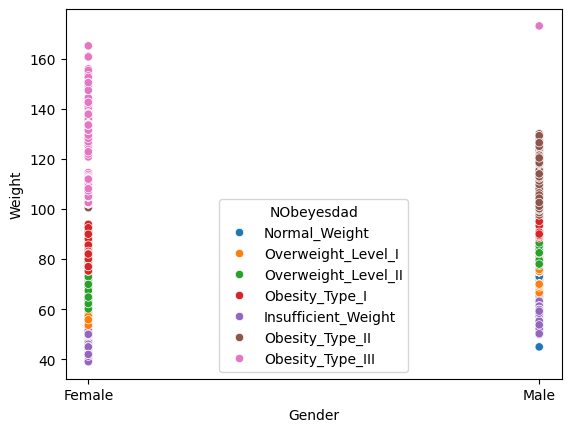

In [53]:

import seaborn as sns
sns.scatterplot(dataset,x='Gender',y='Weight',hue='NObeyesdad')

Se identifica una fuerte correlación de las variables peso y altura con los niveles de obesidad por el rol de las variables en ser determinantes del índice de masa corporal.

<Axes: xlabel='Weight', ylabel='Height'>

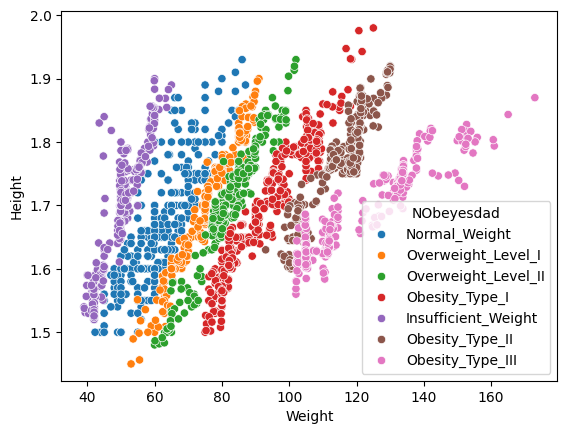

In [51]:
import seaborn as sns
sns.scatterplot(dataset,x='Weight',y='Height',hue='NObeyesdad')

Se evalua la variable historial familiar con sobrepeso: Variable de carácter categórica y binaria. No cuenta con registros faltantes. 

count     2111
unique       2
top        yes
freq      1726
Name: family_history_with_overweight, dtype: object


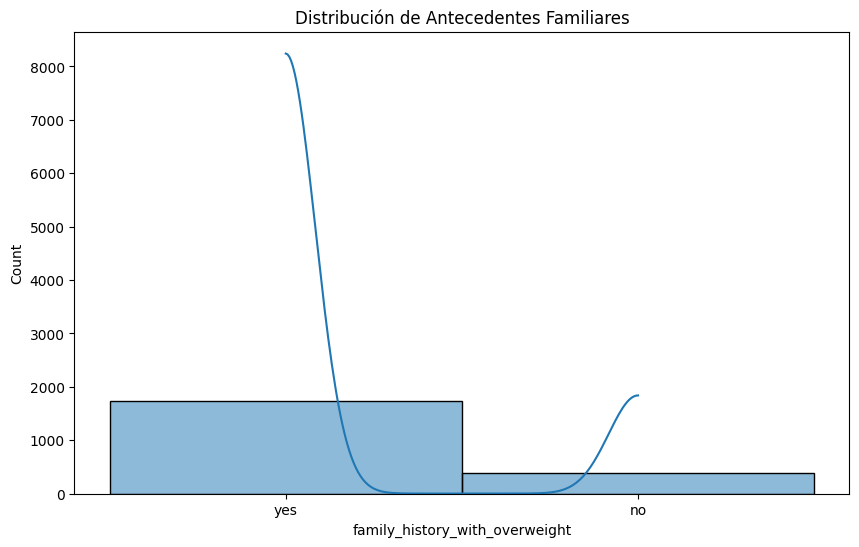

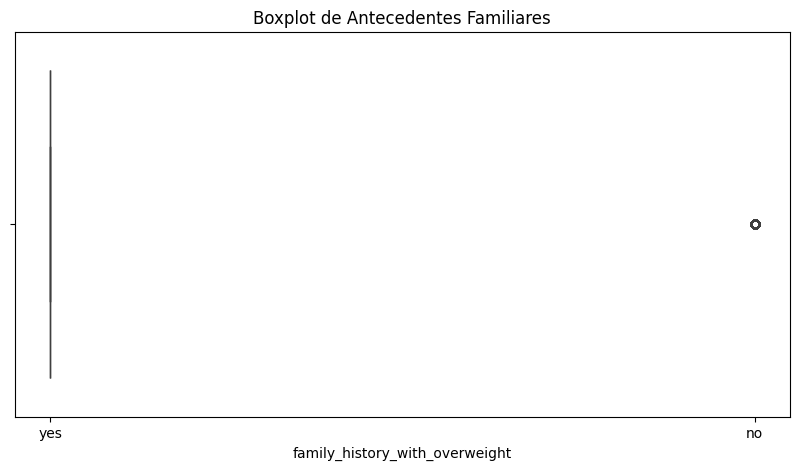

In [33]:
# Descripción de la variable 'Antecedentes Familiares'
print(dataset['family_history_with_overweight'].describe())

# Histograma de la variable 'Antecedentes Familiares'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['family_history_with_overweight'], kde=True)
plt.title('Distribución de Antecedentes Familiares')
plt.show()

# Boxplot de la variable 'Antecedentes Familiares'
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['family_history_with_overweight'])
plt.title('Boxplot de Antecedentes Familiares')
plt.show()

Se evalua la variable FAVC: ¿Consume alimentos ricos en calorías con frecuencia? Variable de carácter categórica y binaria. No cuenta con registros faltantes. 

count     2111
unique       2
top        yes
freq      1866
Name: FAVC, dtype: object


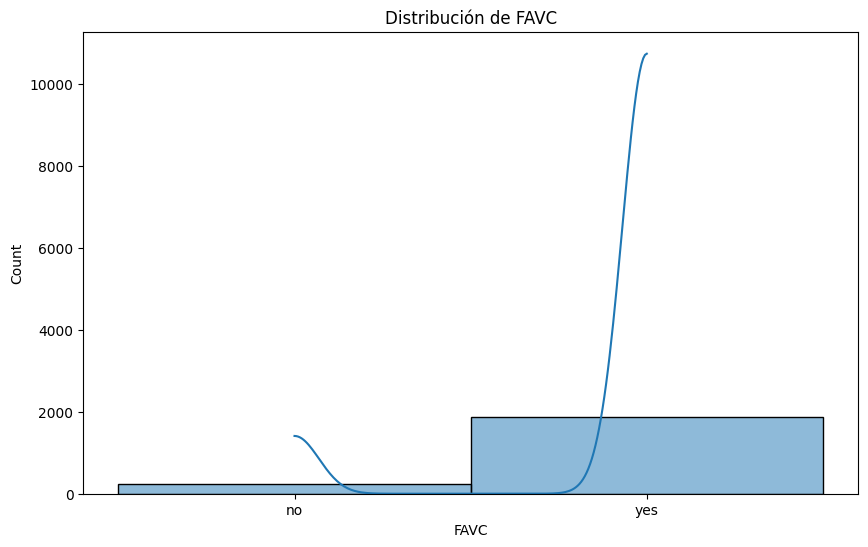

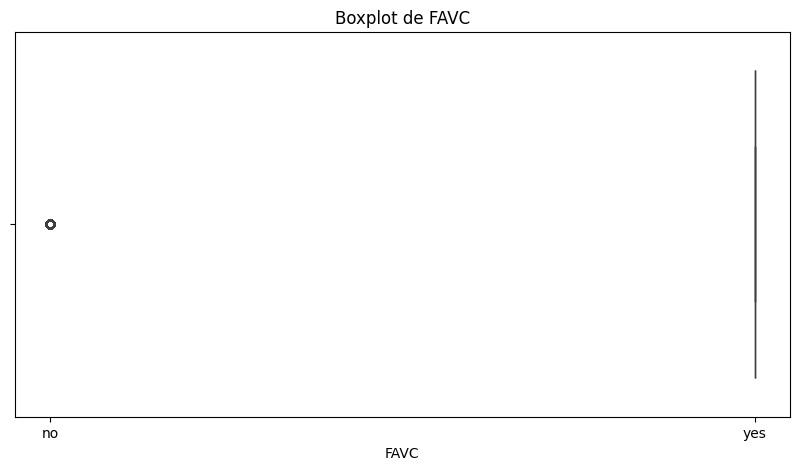

In [34]:
# Descripción de la variable 'FAVC'
print(dataset['FAVC'].describe())

# Histograma de la variable 'FAVC'
plt.figure(figsize=(10, 6))
sns.histplot(dataset['FAVC'], kde=True)
plt.title('Distribución de FAVC')
plt.show()

# Boxplot de la variable 'FAVC'
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['FAVC'])
plt.title('Boxplot de FAVC')
plt.show()

Se evalua la variable FCVC: ¿Suele consumir verduras en las comidas? Variable de carácter numérica. No cuenta con registros faltantes. Valores entre 1 y 3

<Axes: >

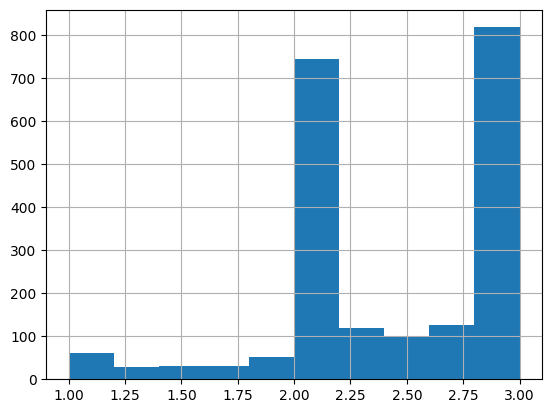

In [54]:
X['FCVC'].hist()

Se evalua la variable NCP: ¿Cuántas comidas principales realiza al día? Variable de carácter numérica. No cuenta con registros faltantes.

<Axes: >

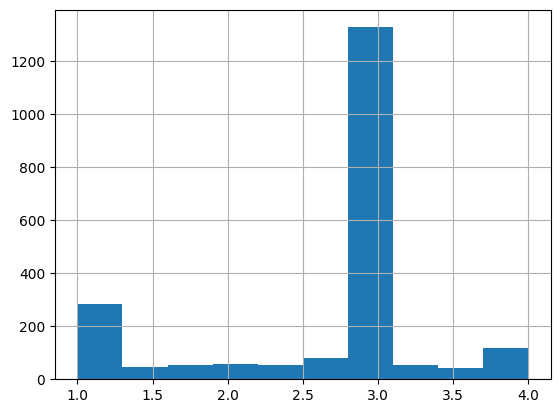

In [55]:
X['NCP'].hist()

Se evalua la variable CAEC: Consume algún alimento entre comidas?  Variable de carácter categórica. No cuenta con registros faltantes. 

<Axes: >

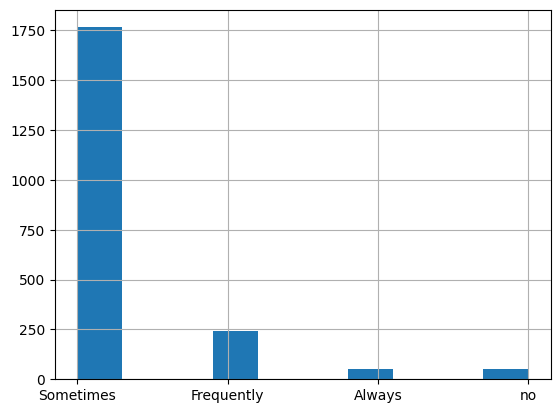

In [56]:
X['CAEC'].hist()

Se evalua la variable Smoke: : Variable de carácter categórica binaria. No cuenta con registros faltantes.  

<Axes: >

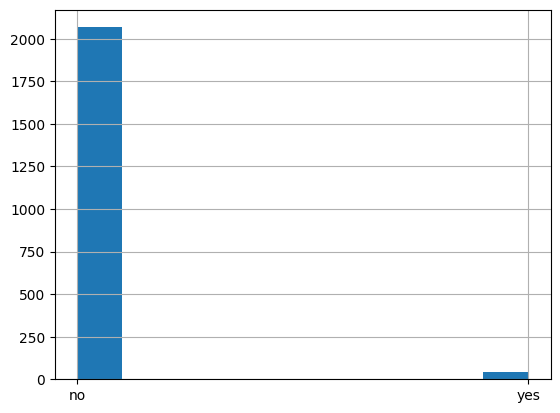

In [57]:
X['SMOKE'].hist()

Se evalua la variable CH2O: ¿Cuánta agua bebe diariamente? Variable de carácter numérica. No cuenta con registros faltantes.

<Axes: >

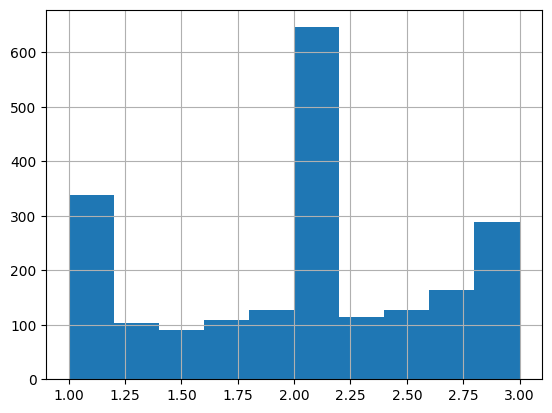

In [58]:
X['CH2O'].hist()

Se evalúa la variable SCC = ¿Controlas las calorías que consumes diariamente?
Es una variable cualitativa binaria. No cuenta con registros faltantes

In [59]:
dataset["SCC"].describe()

count     2111
unique       2
top         no
freq      2015
Name: SCC, dtype: object

In [60]:
!pip install seaborn
 
import seaborn as sns

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2116\887423030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SCC', data=dataset, palette='Set3')


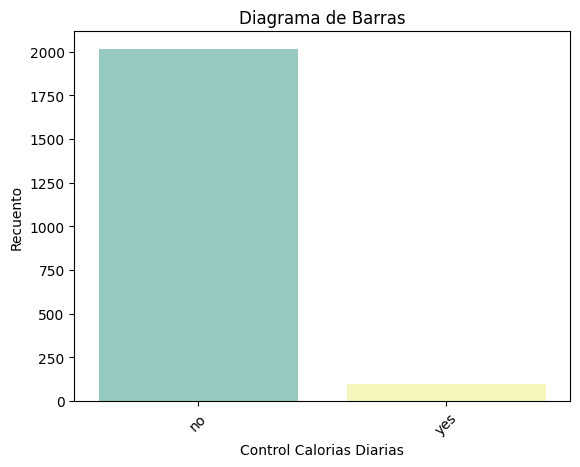

In [61]:
sns.countplot(x='SCC', data=dataset, palette='Set3')
plt.xlabel('Control Calorias Diarias')
plt.ylabel('Recuento')
plt.title('Diagrama de Barras')
plt.xticks(rotation=45)
plt.show()

La gran mayoría de los individuos no realiza un control en el conteo de las calorías diarias

Se evalúa la variable FAF = ¿Con qué frecuencia realiza actividad física?
Es una variable cualitativa contínua cuya respuesta está expresada en números del 0 al 3.

In [62]:
dataset["FAF"].describe()

count    2111.000000
mean        1.010298
std         0.850592
min         0.000000
25%         0.124505
50%         1.000000
75%         1.666678
max         3.000000
Name: FAF, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2116\2940366704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y='FAF', data=dataset, palette='viridis')


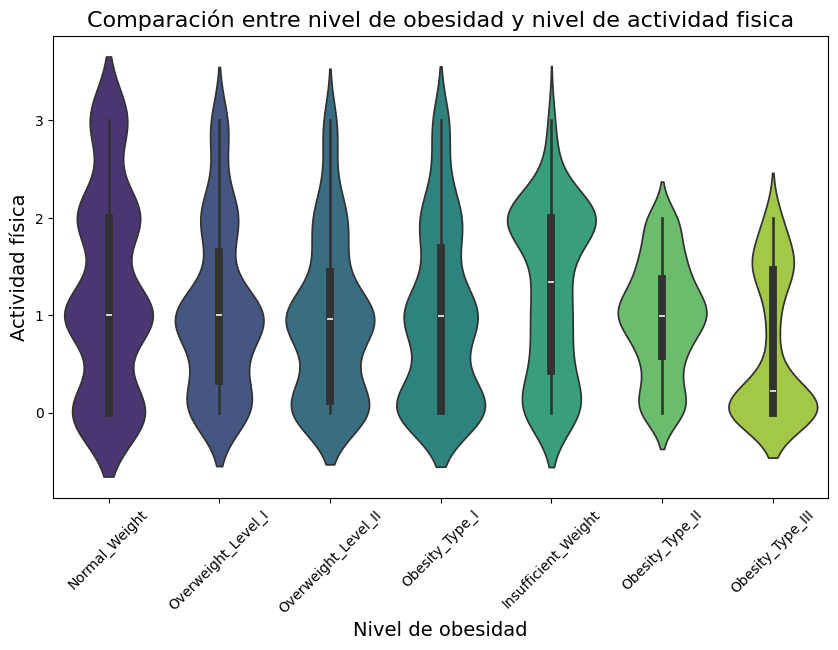

In [63]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='NObeyesdad', y='FAF', data=dataset, palette='viridis')
plt.xlabel('Nivel de obesidad', fontsize=14)
plt.ylabel('Actividad física', fontsize=14)
plt.title('Comparación entre nivel de obesidad y nivel de actividad fisica', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Se evalúa la variable TUE = ¿Cuánto tiempo utiliza dispositivos tecnológicos como celular, videojuegos, televisión, computadora y otros?
Es una variable cuantitativa numérica. Se expresa del 0 al 2.

In [64]:
dataset["TUE"].describe()

count    2111.000000
mean        0.657866
std         0.608927
min         0.000000
25%         0.000000
50%         0.625350
75%         1.000000
max         2.000000
Name: TUE, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2116\2917645519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y='TUE', data=dataset, palette='Set2')


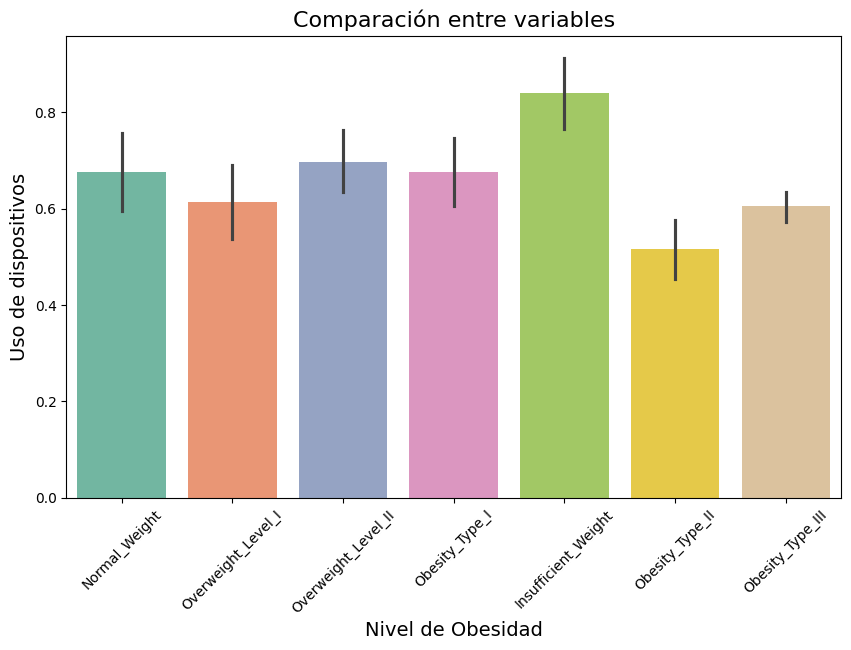

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='NObeyesdad', y='TUE', data=dataset, palette='Set2')
plt.xlabel('Nivel de Obesidad', fontsize=14)
plt.ylabel('Uso de dispositivos', fontsize=14)
plt.title('Comparación entre variables', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Se evalúa la variable CALC = ¿Con qué frecuencia bebe alcohol?
Es una variable cualitativa categórica.

In [67]:
dataset["CALC"].describe()

count          2111
unique            4
top       Sometimes
freq           1401
Name: CALC, dtype: object

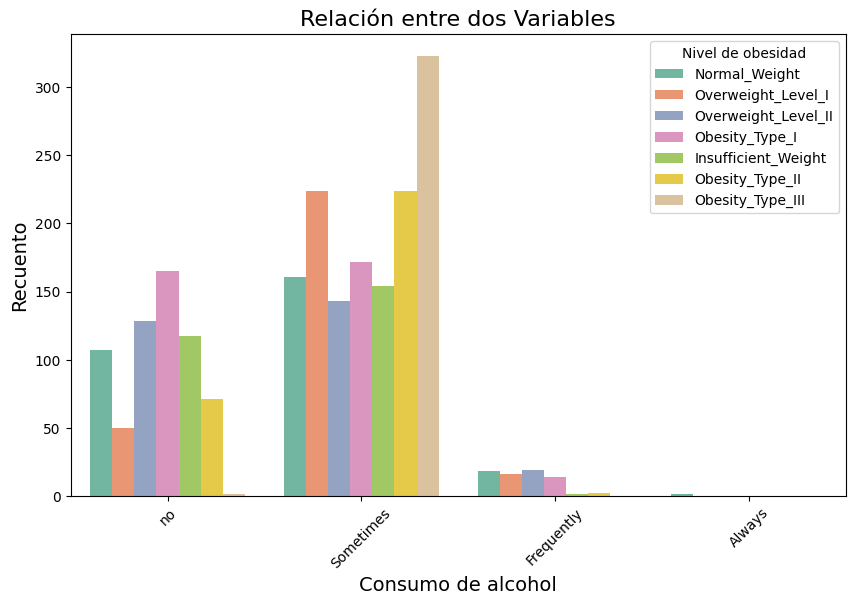

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='CALC', hue='NObeyesdad', data=dataset, palette='Set2')
plt.xlabel('Consumo de alcohol', fontsize=14)
plt.ylabel('Recuento', fontsize=14)
plt.title('Relación entre dos Variables', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Nivel de obesidad')
plt.show()

Se evalúa la variable MTRANS = ¿Qué transporte utiliza habitualmente?
Es una variable cuanlitativa categórica.

In [69]:
dataset["MTRANS"].describe()

count                      2111
unique                        5
top       Public_Transportation
freq                       1580
Name: MTRANS, dtype: object

<Figure size 1000x600 with 0 Axes>

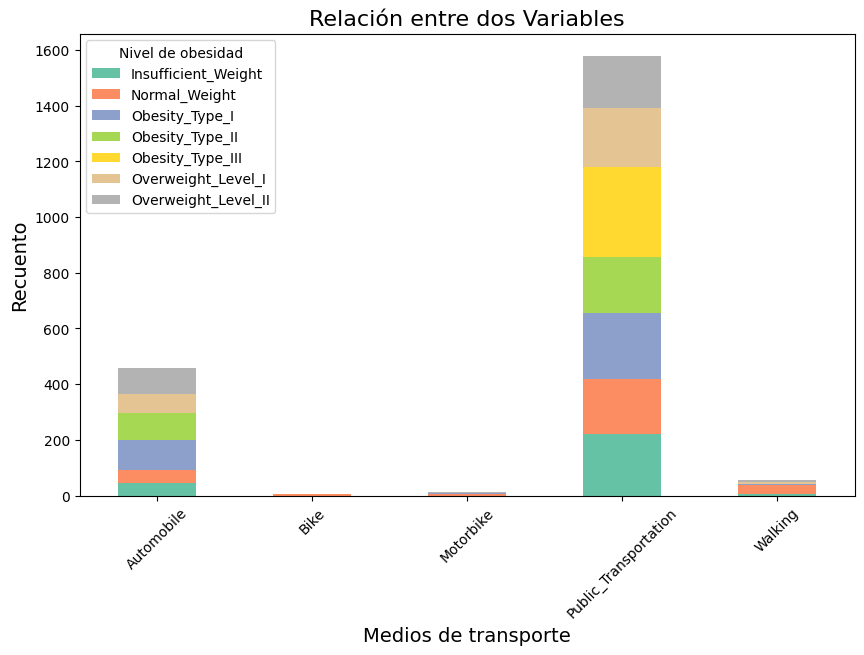

In [70]:
plt.figure(figsize=(10, 6))
df_grouped = dataset.groupby(['MTRANS', 'NObeyesdad']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, cmap='Set2', figsize=(10, 6))
plt.xlabel('Medios de transporte', fontsize=14)
plt.ylabel('Recuento', fontsize=14)
plt.title('Relación entre dos Variables', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Nivel de obesidad')
plt.show()

In [71]:
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<p align="justify">No existen valores nulos en el conjunto de datos, lo que facilita el manejo de la información.</p>

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Se explora la variable objetivo

In [74]:
dataset['NObeyesdad'] .value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Se mide la correlación en el conjunto de datos

In [75]:
X_numeric = X.select_dtypes(include=['float64'])
print(X_numeric.columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [76]:
correlation_matrix = X_numeric.corr()
print(correlation_matrix)


             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


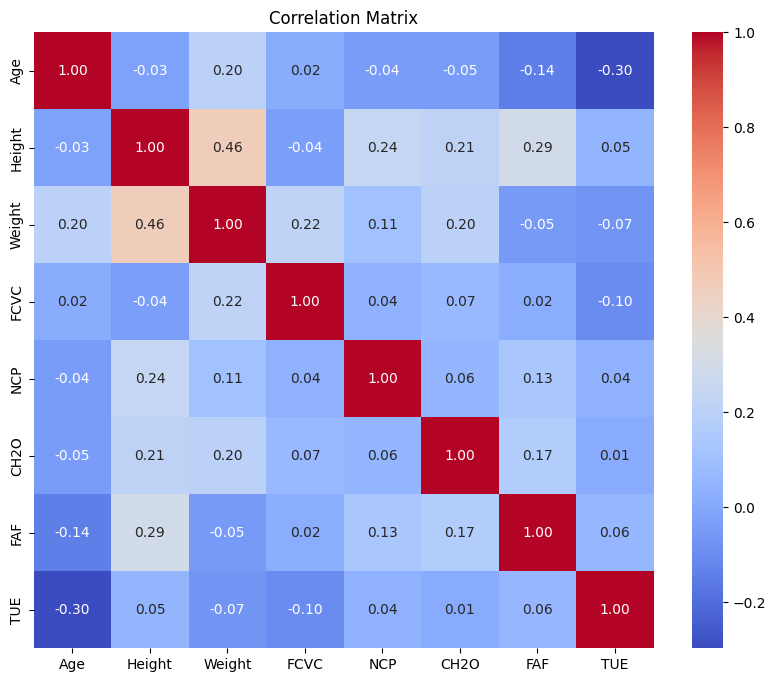

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Variables a considerar quitar en el modelo

Se eliminan las variables de altura y peso para evitar la multicolinealidad del Índice de Masa Corporal y no alterar el modelo para poder evidenciar los hábitos y características que influyen en la obesidad. 

<Axes: xlabel='Weight', ylabel='Height'>

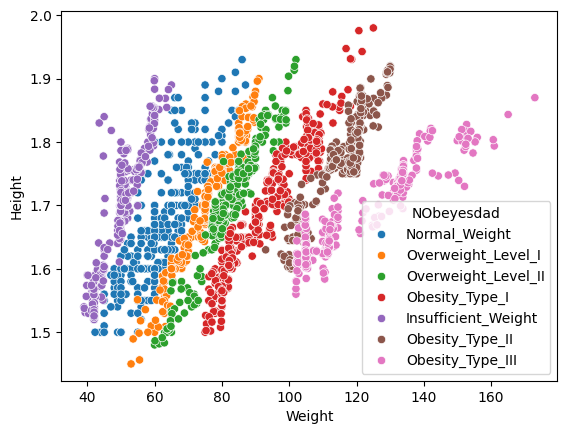

In [20]:

import seaborn as sns
sns.scatterplot(data=df,x='Weight',y='Height',hue='NObeyesdad')